In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [24]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

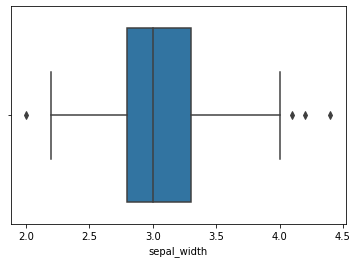

In [25]:
sns.boxplot(df["sepal_width"])

In [26]:
Q1 = df["sepal_width"].quantile(0.25)
Q3 = df["sepal_width"].quantile(0.75)
IQR = Q3-Q1
lowerlimit = Q1 - 1.5*IQR
upperlimit = Q3 + 1.5*IQR


In [27]:
outlier = df[(df["sepal_width"]>lowerlimit)&(df["sepal_width"]<upperlimit)]
outlier

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

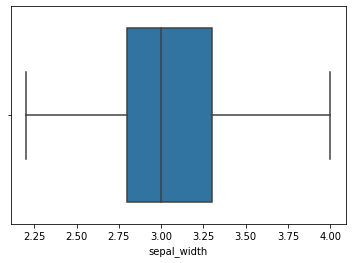

In [28]:
sns.boxplot(outlier["sepal_width"])

In [36]:
# from sklearn.preprocessing import MinMaxScaler
# catname = np.array(["Iris-setosa","Iris-versicolor","Iris-virginica"])
# outlier["species"] = catname[]
outlier.replace(to_replace=["Iris-setosa","Iris-versicolor","Iris-virginica"],value=[1,2,3], inplace=True)
outlier.head()

C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [37]:
X = outlier.iloc[:,:-1]
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
Y = outlier["species"]


0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 146, dtype: int64

In [113]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y , test_size=0.30, random_state=20)

In [114]:
model = GaussianNB()
model.fit(Xtrain,Ytrain)

GaussianNB()

In [115]:
y_predict = model.predict(Xtest)
y_predict

array([2, 1, 2, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 2,
       3, 2, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 2],
      dtype=int64)

In [116]:
model.score(Xtest, Ytest)

0.8636363636363636

<AxesSubplot:>

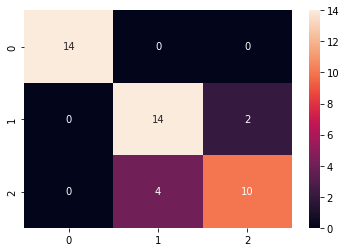

In [117]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(Ytest, y_predict)
sns.heatmap(cm,annot=True)

In [118]:
accuracy_score(Ytest, y_predict)

0.8636363636363636

In [119]:
tp_setosa = cm[0][0]
fn_setosa = cm[1][0]+cm[2][0]
fp_setosa = cm[0][1]+cm[0][2]
tn_setosa = cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]

In [120]:
acc = (tp_setosa+tn_setosa)/(tp_setosa+tn_setosa+fp_setosa+fn_setosa)
acc

1.0